In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# k-means

O algoritmo de k-médias (k-means) é um dos algoritmos mais simples de clustering. A idéia básica é a seguinte:

- Escolhe-se, a priori, um número $k$ de clusters. A escolha de um bom número de clusters é um problema não resolvido em machine learning, mas com algum conhecimento do domínio de aplicação podemos fazer boas escolhas aqui.

- Cada cluster é caracterizado por um valor de centróide (daí o nome 'k-means').

- Cada ponto do conjunto é atribuido ao cluster de seu centróide mais próximo.

Estas características do modelo k-means praticamente definem o algoritmo:

1. Inicialize os $k$ centróides aleatoriamente. Uma abordagem bastante popular é escolher $k$ pontos ao acaso dentro do dataset.

2. Enquanto não convergiu:

    2.1. Associe cada ponto ao seu centroide mais próximo
    
    2.2. Atualize cada centróide como sendo o ponto médio dos pontos a ele atribuidos.

O código abaixo demonstra a evolução dos centróides de um dataset aleatório com 3 clusters:

In [2]:
from sklearn.datasets import make_blobs

# Note que estamos ignorando os labels y - este é um problema de clustering,
# não de classificação.
X, _ = make_blobs(
    n_samples=200,
    centers=3,
    n_features=2,
    cluster_std=2.5,
    random_state=RANDOM_SEED,
)

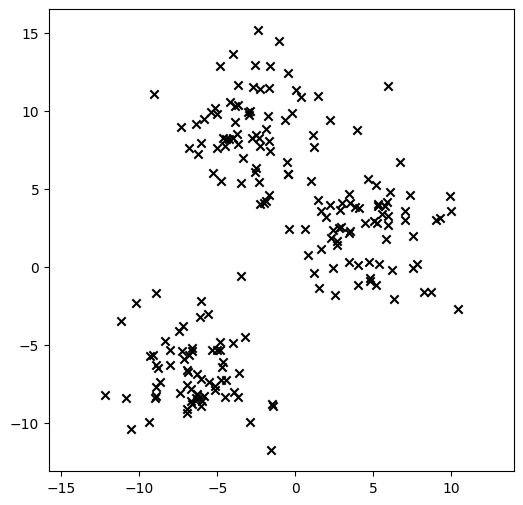

In [3]:
plt.figure(figsize=(6, 6))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c='black',
    marker='x',
)
plt.axis('equal')
plt.show()

In [4]:
k = 3
num_points = X.shape[0]

# Seleciona os centroides iniciais através de sorteio de pontos do dataset.
np.random.seed(RANDOM_SEED)
idx = np.random.choice(
    num_points,
    size=(k,),
    replace=False,
)
C = X[idx, :]

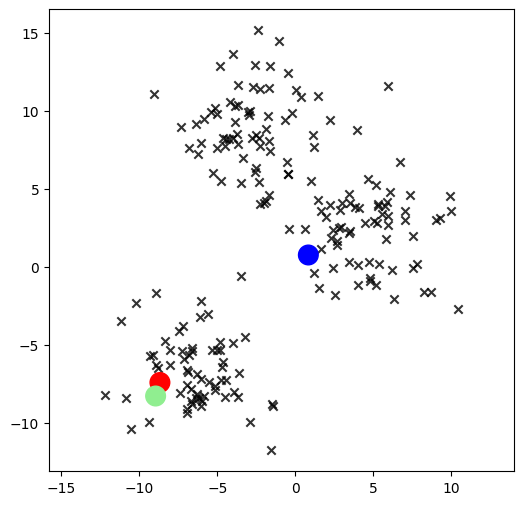

In [5]:
colors = ['red', 'lightgreen', 'blue']

plt.figure(figsize=(6, 6))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c='black',
    marker='x',
    alpha=0.8,
)
plt.scatter(
    C[:, 0],
    C[:, 1],
    c=colors,
    s=200,
)
plt.axis('equal')
plt.show()

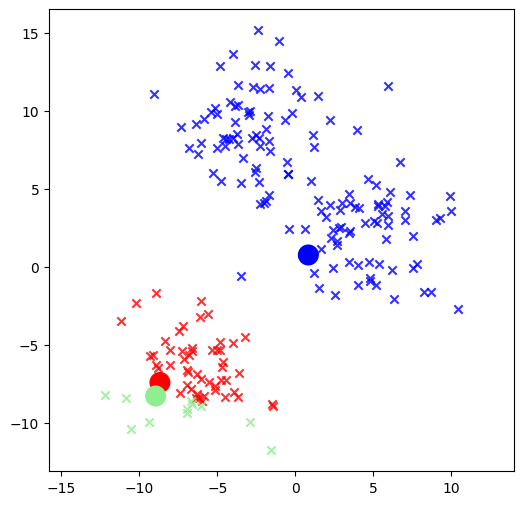

In [6]:
# Agora associa cada ponto do dataset ao seu centroide mais proximo.
def distancia(a, b):
    return np.sqrt(np.sum((a - b)**2))


def acha_mais_proximo(x, C):
    num_centroides = C.shape[0]
    mais_proximo = 0
    dist_mais_proximo = distancia(x, C[0, :])
    for j in range(1, num_centroides):
        dist = distancia(x, C[j, :])
        if dist < dist_mais_proximo:
            dist_mais_proximo = dist
            mais_proximo = j
    return mais_proximo


def atualiza_cluster(X, C):
    cluster = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        cluster[i] = acha_mais_proximo(X[i, :], C)
    return cluster


cluster = atualiza_cluster(X, C)

plt.figure(figsize=(6, 6))
for i in range(k):
    idx = cluster == i  # Seleciona pontos deste cluster.
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=colors[i],
        marker='x',
        alpha=0.8,
    )
plt.scatter(
    C[:, 0],
    C[:, 1],
    c=colors,
    s=200,
)
plt.axis('equal')
plt.show()

Antigo é bolinha, novo é diamante.


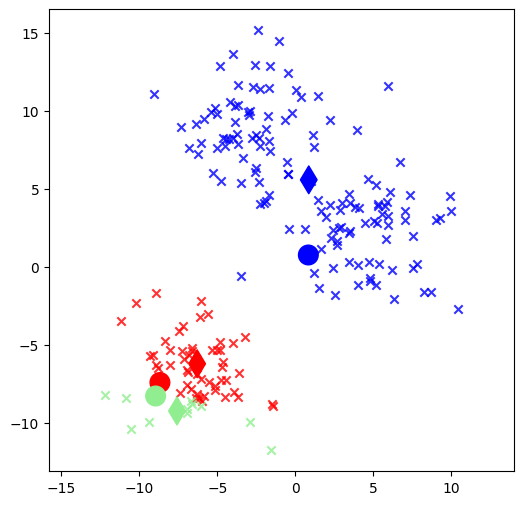

In [7]:
# Recalcula os centroides.
def recalcula_centroides(X, cluster, k):
    dims = X.shape[1]
    C = np.zeros((k, dims))
    for i in range(k):
        idx = cluster == i
        C[i, :] = X[idx, :].mean(axis=0)
    return C


C_novo = recalcula_centroides(X, cluster, k)

print('Antigo é bolinha, novo é diamante.')

plt.figure(figsize=(6, 6))
for i in range(k):
    idx = cluster == i
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=colors[i],
        marker='x',
        alpha=0.8,
    )
plt.scatter(
    C[:, 0],
    C[:, 1],
    c=colors,
    s=200,
)
plt.scatter(
    C_novo[:, 0],
    C_novo[:, 1],
    c=colors,
    s=200,
    marker='d',
)
plt.axis('equal')
plt.show()

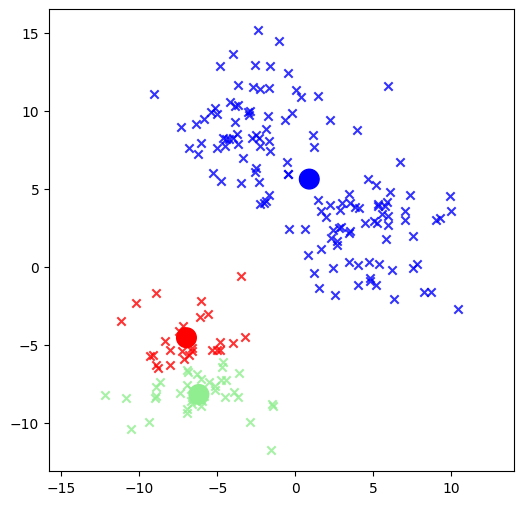

In [8]:
# Por fim, o algoritmo k-means repete o processo várias vezes.
def max_dist_pontos(C, C_novo):
    max_dist = 0.0
    for i in range(C.shape[0]):
        dist = distancia(C[i, :], C_novo[i, :])
        if dist > max_dist:
            max_dist = dist
    return max_dist


def k_means(X, k, C_init=None, max_iter=10, eps=1e-3):
    if C_init is None:
        # Seleciona os centroides iniciais.
        idx = np.random.choice(
            X.shape[0],
            size=(k,),
            replace=False,
        )
        C = X[idx, :]
    else:
        C = C_init

    for i in range(max_iter):
        cluster = atualiza_cluster(X, C)
        C_novo = recalcula_centroides(X, cluster, k)
        max_dist = max_dist_pontos(C, C_novo)
        C = C_novo
        if max_dist < eps:
            break
    return C


np.random.seed(RANDOM_SEED)
C = k_means(X, k)

cluster = atualiza_cluster(X, C)

plt.figure(figsize=(6, 6))
for i in range(k):
    idx = cluster == i
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=colors[i],
        marker='x',
        alpha=0.8,
    )
plt.scatter(
    C[:, 0],
    C[:, 1],
    c=colors,
    s=200,
)
plt.axis('equal')
plt.show()

Observe que o k-means convergiu, mas não para a clusterização esperada! Vamos repetir o processo com pontos iniciais mais razoáveis:

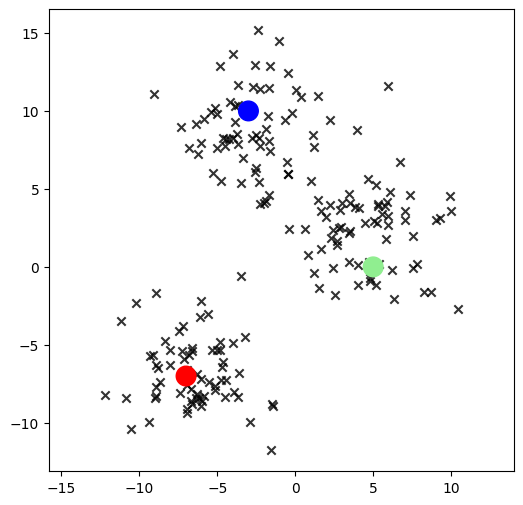

In [9]:
C = np.array([[-7, -7], [5, 0], [-3, 10]])

plt.figure(figsize=(6, 6))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c='black',
    marker='x',
    alpha=0.8,
)
plt.scatter(
    C[:, 0],
    C[:, 1],
    c=colors,
    s=200,
)
plt.axis('equal')
plt.show()

Agora vamos ver se o algoritmo converge para algo mais razoavel:

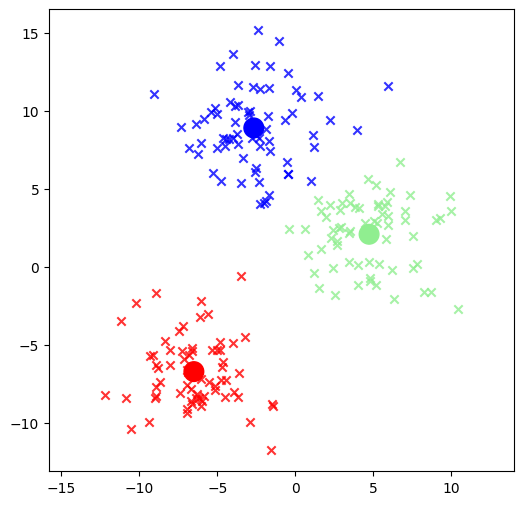

In [10]:
np.random.seed(RANDOM_SEED)
C = k_means(X, k, C_init=C)

cluster = atualiza_cluster(X, C)

plt.figure(figsize=(6, 6))
for i in range(k):
    idx = cluster == i
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=colors[i],
        marker='x',
        alpha=0.8,
    )
plt.scatter(
    C[:, 0],
    C[:, 1],
    c=colors,
    s=200,
)
plt.axis('equal')
plt.show()

Ok, parece que agora funcionou...

**Atividade:**

Considere a situação abaixo:

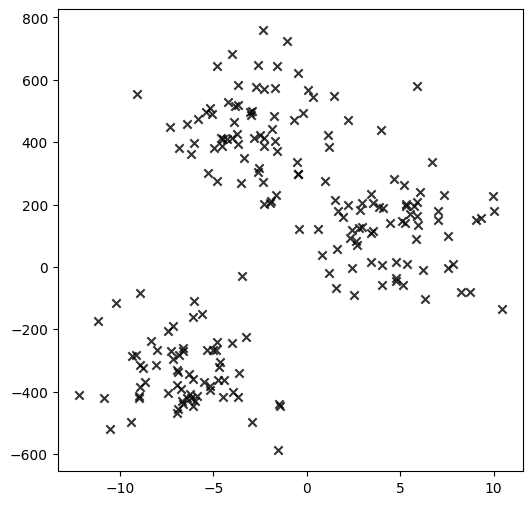

In [11]:
Xs = X.copy()
Xs[:, 1] *= 50

plt.figure(figsize=(6, 6))
plt.scatter(
    Xs[:, 0],
    Xs[:, 1],
    c='black',
    marker='x',
    alpha=0.8,
)
# plt.axis('equal')
plt.show()

- Aplique o algoritmo k-means para clusterizar este dataset, e mostre o resultado final.

- Este clustering ficou bom? Explique o que aconteceu.

**R:**

- Qual a complexidade de cada passo do algoritmo k-means?

**R:**

**Atividade:**

Implemente o clustering do dataset original usando o scikit-learn.

# Mean shift clustering

Observamos que geralmente os clusters tem uma densidade de pontos maior em seu centro do que na periferia. Agora imagine um ponto qualquer do conjunto de dados: como a vizinhança deste ponto se parece? Pela propriedade anterior, podemos imaginar que existe uma densidade maior de pontos na vizinhança de um ponto dado na direção do centro do cluster. Se calcularmos o ponto médio dos pontos desta vizinhança, nos aproximamos do centro do cluster.

Essa é a idéia básica do algoritmo "mean shift clustering". Vamos explorar este conceito. Primeiramente vamos sortear pontos ao acaso do dataset.

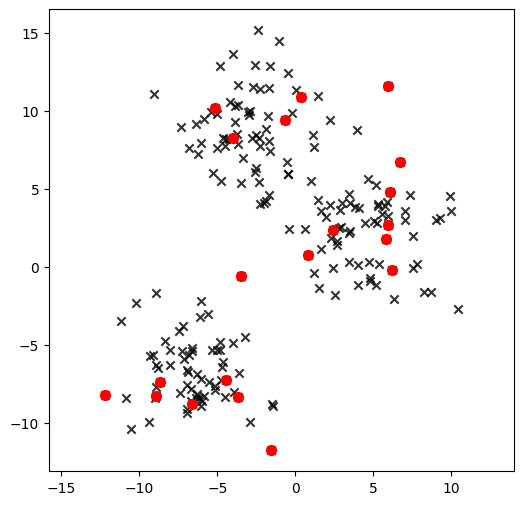

In [12]:
num_seed_pts = 20

# Seleciona os pontos iniciais.
np.random.seed(RANDOM_SEED)
idx = np.random.choice(
    X.shape[0],
    size=(num_seed_pts,),
    replace=False,
)
C = X[idx, :]

plt.figure(figsize=(6, 6))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c='black',
    marker='x',
    alpha=0.8,
)
plt.scatter(
    C[:, 0],
    C[:, 1],
    c='red',
    s=50,
)
plt.axis('equal')
plt.show()

Agora procedemos da seguinte forma: para cada ponto de referência em C, vamos determinar a posição média de seus vizinhos (dentro de um raio dado).

In [13]:
R = 5


def atualiza_pontos(X, C, R):
    C_novo = np.zeros(C.shape)
    n_novo = np.zeros(C.shape[0])

    for i in range(C.shape[0]):
        for j in range(X.shape[0]):
            if distancia(X[j, :], C[i, :]) < R:
                C_novo[i, :] += X[j, :]
                n_novo[i] += 1.0
        C_novo[i, :] /= n_novo[i]
    return C_novo


C_novo = atualiza_pontos(X, C, R)

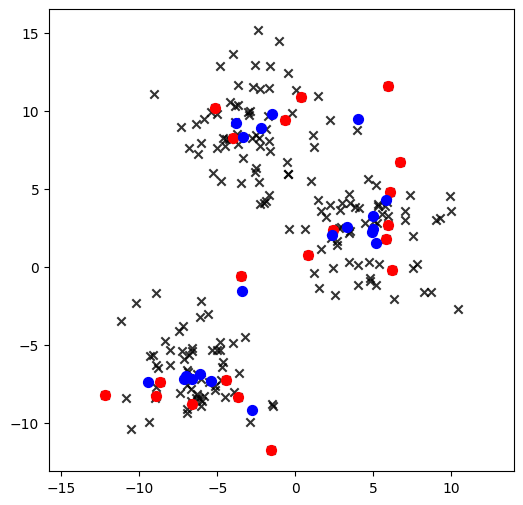

In [14]:
plt.figure(figsize=(6, 6))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c='black',
    marker='x',
    alpha=0.8,
)
plt.scatter(
    C[:, 0],
    C[:, 1],
    c='red',
    s=50,
)
plt.scatter(
    C_novo[:, 0],
    C_novo[:, 1],
    c='blue',
    s=50,
)
plt.axis('equal')
plt.show()

Observe que os pontos atualizados migraram para o centro dos clusters! Vamos agora agrupar pontos que estão muito próximos entre si, pois não faz sentido manter dois pontos idênticos neste conjunto.

In [15]:
def elimina_similares(C, eps=1e-3):
    C_novo = C.copy()
    i = 0
    while i < C_novo.shape[0]:
        j = i + 1
        while j < C_novo.shape[0]:
            if distancia(C_novo[i, :], C_novo[j, :]) < eps:
                C_novo = np.delete(C_novo, (j), axis=0)
            else:
                j += 1
        i += 1
    return C_novo


C = elimina_similares(C)

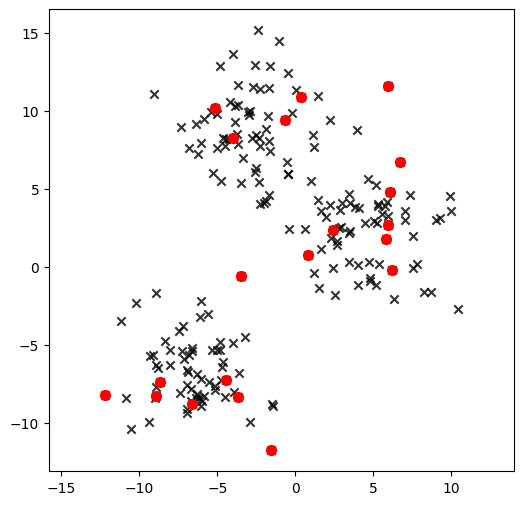

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c='black',
    marker='x',
    alpha=0.8,
)
plt.scatter(
    C[:, 0],
    C[:, 1],
    c='red',
    s=50,
)
plt.axis('equal')
plt.show()

Vamos continuar este processo até que o algoritmo convirja:

In [17]:
def mean_shift(
    X,
    C_init=None,
    k=10,
    max_iter=30,
    eps_elimina=1e-9,
    eps_para=1e-9,
):
    if C_init is None:
        # Seleciona os centroides iniciais.
        idx = np.random.choice(
            X.shape[0],
            size=(k,),
            replace=False,
        )
        C = X[idx, :]
    else:
        C = C_init

    for i in range(max_iter):
        C_novo = atualiza_pontos(X, C, R)
        max_dist = max_dist_pontos(C, C_novo)
        C = C_novo
        if max_dist < eps_para:
            break
        C = elimina_similares(C, eps=eps_elimina)

    return C


C_mf = mean_shift(X, k=20, eps_elimina=0.5, eps_para=1e-6)
print(C_mf)

[[-2.94933702  8.60851951]
 [-6.4569137  -6.79066111]
 [ 4.15177938  2.19477722]]


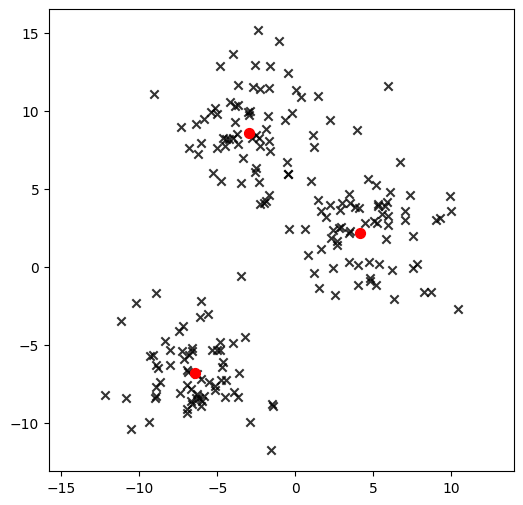

In [18]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c='black', marker='x', alpha=0.8)
plt.scatter(C_mf[:, 0], C_mf[:, 1], c='red', s=50)
plt.axis('equal')
plt.show()

Finalmente podemos associar cada amostra ao seu ponto representativo mais próximo, como no caso do k-means:

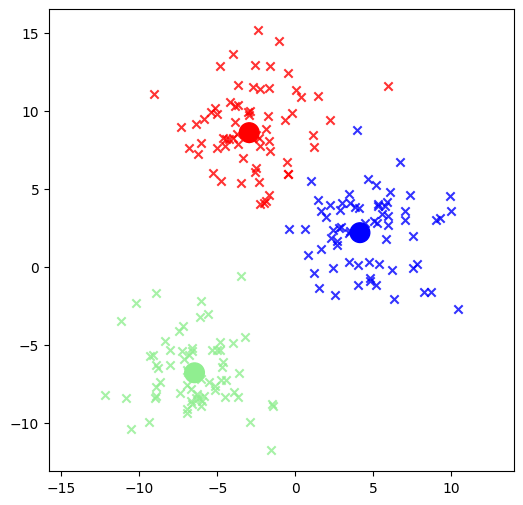

In [19]:
cluster = atualiza_cluster(X, C_mf)

plt.figure(figsize=(6, 6))

for i in range(C_mf.shape[0]):
    idx = cluster == i
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=colors[i],
        marker='x',
        alpha=0.8,
    )

plt.scatter(
    C_mf[:, 0],
    C_mf[:, 1],
    c=colors,
    s=200,
)

plt.axis('equal')
plt.show()

**Atividade:**

Implemente o clustering do dataset original usando scikit-learn

# Outros métodos

Existem vários outros métodos de clustering, como DBSCAN, clustering hierárquico aglomerativo e modelos de mistura de Gaussianas, que valem a pena conhecer. Mas para uma aula introdutória de clustering, está bom.

**Atividades:**

- Explique o funcionamento do DBSCAN
- Explique o funcionamento do clustering hierárquico. Compare com árvores de decisão.

**R:**

# Apendice: clustering de palavras usando word2vec

In [20]:
!pip install gensim

                                              0.0/24.0 MB ? eta -:--:--
                                              0.0/24.0 MB ? eta -:--:--
                                             0.1/24.0 MB 812.7 kB/s eta 0:00:30
                                              0.4/24.0 MB 3.7 MB/s eta 0:00:07
     -                                        0.8/24.0 MB 5.4 MB/s eta 0:00:05
     -                                        1.2/24.0 MB 6.8 MB/s eta 0:00:04
     --                                       1.3/24.0 MB 7.1 MB/s eta 0:00:04
     --                                       1.4/24.0 MB 6.1 MB/s eta 0:00:04
     ---                                      2.1/24.0 MB 8.3 MB/s eta 0:00:03
     ---                                      2.4/24.0 MB 7.5 MB/s eta 0:00:03
     ----                                     2.8/24.0 MB 8.1 MB/s eta 0:00:03
     -----                                    3.2/24.0 MB 8.5 MB/s eta 0:00:03
     ------                                   3.6/24.0 MB 8.5 MB/


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\leona\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [21]:
import string

from gensim.models import Word2Vec
from sklearn.datasets import fetch_20newsgroups

In [22]:
def process_doc(doc):

    def normalize_string(s):
        table_punct = str.maketrans({key: None for key in string.punctuation})
        return s.strip().lower().translate(table_punct)

    return ' '.join([normalize_string(line) for line in doc.split('\n')])


data = fetch_20newsgroups(subset='train', shuffle=True)

sentences = np.array(
    [process_doc(doc).split() for doc in data.data],
    dtype=object,
)
print(sentences.shape)

(11314,)


In [23]:
# train model
model = Word2Vec(sentences, vector_size=300, min_count=50)
words = model.wv.index_to_key
X_words = model.wv[words]

In [24]:
model.wv.most_similar('bike')

[('car', 0.8013074994087219),
 ('helmet', 0.7425589561462402),
 ('riding', 0.7060953974723816),
 ('head', 0.6483738422393799),
 ('truck', 0.6422785520553589),
 ('ride', 0.6378766894340515),
 ('tires', 0.6328385472297668),
 ('seat', 0.6313955783843994),
 ('rear', 0.6175042986869812),
 ('shop', 0.6130392551422119)]

In [25]:
print(X_words.shape)

(5332, 300)


In [26]:
from sklearn.cluster import KMeans

n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_SEED)
result = kmeans.fit_predict(X_words)

C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
def cosine(a, b):
    return a.dot(b) / np.sqrt(a.dot(a) * b.dot(b))


words_per_cluster = [[] for _ in range(n_clusters)]

for w, x, k in zip(words, X_words, result):
    dist = 1 - cosine(x, kmeans.cluster_centers_[k])
    words_per_cluster[k].append((dist, w))

In [28]:
import heapq
from pprint import pprint

n_words = 20

for i in range(n_clusters):
    print(f'Cluster {i}')
    print('-----')
    pprint([res[1] for res in heapq.nsmallest(n_words, words_per_cluster[i])])
    print()

Cluster 0
-----
['66',
 '78',
 '62',
 '52',
 '58',
 '83',
 '53',
 '56',
 '79',
 '67',
 '76',
 '63',
 '57',
 '82',
 '46',
 '68',
 '39',
 '74',
 '77',
 '54']

Cluster 1
-----
['religion',
 'belief',
 'nature',
 'existence',
 'faith',
 'scripture',
 'sin',
 'interpretation',
 'doctrine',
 'quran',
 'teachings',
 'truth',
 'conclusion',
 'definition',
 'argument',
 'christianity',
 'statement',
 'marriage',
 'god',
 'assumption']

Cluster 2
-----
['replies',
 'responses',
 'reply',
 'comments',
 'email',
 'info',
 'mail',
 'newsgroups',
 'postings',
 'addresses',
 'request',
 'posting',
 'respond',
 'newsgroup',
 'address',
 'post',
 'send',
 'references',
 'ftp',
 'anonymous']

Cluster 3
-----
['graham',
 'williams',
 'gtoalgtoalcom',
 'jay',
 'steven',
 'anderson',
 'jr',
 'jerry',
 'gregory',
 'taylor',
 'toal',
 'allan',
 'allen',
 'keithccocaltechedu',
 'hughes',
 'anthony',
 'edward',
 'thompson',
 'stephen',
 'glenn']

Cluster 4
-----
['dodgers',
 'flyers',
 'reds',
 'devils',
 'haw